# Bayesian Nash Equilibrium Against Malicious Users

The objective of this notebook is to demonstrate how Bayes Theorem can help to calculate the probability of a user to be malicious, and how Game Theory's Nash Equilibrium can be used to draw a line between two strategies: block or allow.

To demonstrate this, we will use the context of a web site that has a large majority of legitimate users, and very few users who try to abuse it.

## Nash Equilibrium: Deciding which strategy to use, and when.

### Components of our game

In Game Theory, we need `Players`, `Strategies` and `Payoffs`.

Because we are adding Bayes on top of this, we  need to add two elements to the Players:
* Players
    * `Type`
    * `Common Prior Belief`
* Strategies 
* Payoffs  

## The Game

This is a game of Incomplete Information. 

As an example, here is a game between two players. Player1 can be of Type A or Type B. And for each strategies, their payoffs.

A Type 

| | Left | Right|  
| -- | -- | -- |   
| up | 1,2 | 2,3 | 
| down | 3,4 | 5,6 |  

B Type

| | Left | Right |
| -- | -- | -- |
| up | 4,3 | 3,2 |
| down | 7,4 | 4,2 |

### The Players Types
Player 1 represents each of our users: As player 2, we know that Player 1 can be of two types. But we don't know which one.
    * Player 1: A Type, with probability p
    * Player 1: B Type, with probability 1-p

Player 2 knows that he is good, of course. And player 1 knows that as well.

### Common Prior Belief
About the `Common Prior Belief` now. By experience, Player 2 knows (or at least have an idea of) the probability of a user of being of A Type or B Type.
- Player 1 knows that Player 2 knows that player 1 can be an A Type player with probability p, or a B Type player with probability 1-p.
- Player 2 knows that Player 1 knows that player 2 knows that player 1 can be A Type or B Type
- Player 1 knows that player 2 knows that Player 1 knows that player 2 knows that player 1 can be A Type or B Type
- And so on. All this to confirm that no player is taking the other player for an idiot.

### Strategies

In the example above, Player 2 should take the strategy "Down" if he believe that Player 1 is of Type A with a probability of 40%.

## Applying this to Attack Prevention

Let's apply the theory to a scenario: We are a web site owner, and we want to serve our users.

We know that our users can be of two types:
* A Type: Dishonest user
* B Type: Honest user

The way the model is built, it is important to keep the dishonest user as A Type.

### How do we define the payoffs?

In Information Security, we use risk assessments to quantify our risks. For the web, [OWASP has a nice Risk Rating Methodology model that can be easily used](https://www.owasp.org/index.php/OWASP_Risk_Rating_Methodology)

We will use this model to calculate the payoffs of our players, plus few adjustments to take into consideration the cost of the countermeasures and the risk of misclassification of our users:

Player 1: 
    * Threat Agent Factors (skill, motive, opportunity, size)
    * Vulnerability Factors (discovery, exploit, awareness, risk to be detected)

Player 2:
    * Technical Impact Factors (loss of confidentiality, integrity, availability, accountability)
    * Business Impact Factors (financial damage, reputation damage, compliance, privacy violation)
    * Countermeasure Costs (development, external costs, operation costs, technical debt)
    * Misclassification Impact (loss of sales, customers, bad publicity, customer service calls)
    
Each factors are averaged by 4, and are used to calculate the payoffs of each players

Under each factor's elements, we added a weight that allows us to define how imporant we think each element is. The total of the weight should be **1** (100%), but the code doesn't assume that everyone is good at additions.

## Vulnerability Definition (example)

### Description

* The website is vulnerable to login bruteforces
* We have a weak attack detection mechanism

### Risks

Attackers could attack the login function and compromise users
Personal data can be leaked
Depending of the password strength of our users, a large number of users could be compromised.

### Risk Classification

For this part, we use the [OWASP Risk Rating Methodology](https://www.owasp.org/index.php/OWASP_Risk_Rating_Methodology) to assign a score to each factors

In [1]:
# Threat Agent Factors

# Skill level
# How technically skilled is this group of threat agents? 
# * No technical skills (1), 
# * some technical skills (3), 
# * advanced computer user (5), 
# * network and programming skills (6), 
# * security penetration skills (9),
skill_level = 6
skill_level_weight = 0.25

# Motive
# How motivated is this group of threat agents to find and exploit this vulnerability? 
# * Low or no reward (1), possible reward (4), high reward (9)
motive = 8
motive_weight = 0.25

# Opportunity
# What resources and opportunities are required for this group of threat agents to find and exploit this vulnerability?
# * Full access or expensive resources required (0), 
# * special access or resources required (4), 
# * some access or resources required (7), 
# * no access or resources required (9)
opportunity = 7
opportunity_weight = 0.25

# Size
# How large is this group of threat agents? 
# * Developers (2), 
# * system administrators (2), 
# * intranet users (4), 
# * partners (5), 
# * authenticated users/customers(6), 
# * anonymous Internet users (9)
size = 9
size_weight = 0.25

threat_agent_factors = skill_level * skill_level_weight + motive * motive_weight + opportunity * opportunity_weight + size * size_weight / (skill_level_weight + motive_weight + opportunity_weight + size_weight)

print('Threat Agent Factors: {}'.format(threat_agent_factors))

Threat Agent Factors: 7.5


The `Threat Agent Factors` score represents how motivated we think a dishonest Player 1 (the attacker) is.

In [2]:
# Vulnerability Factors

# Ease_of discovery
# How easy is it for this group of threat agents to discover this vulnerability? 
# * Practically impossible (1), 
# * difficult (3), 
# * easy (7), 
# * automated tools available (9)
ease_of_discovery = 9
ease_of_discovery_weight = 0.25

# Ease of exploit
# How easy is it for this group of threat agents to actually exploit this vulnerability? 
# Theoretical (1), difficult (3), easy (5), automated tools available (9)
ease_of_exploit = 9
ease_of_exploit_weight = 0.25

# Awareness
# How well known is this vulnerability to this group of threat agents? 
# Unknown (1), hidden (4), obvious (6), public knowledge (9)
awareness = 6
awareness_weight = 0.25

# Intrusion detection
# How likely is an exploit to be detected? 
# Active detection in application (1), logged and reviewed (3), logged without review (8), not logged (9)
intrusion_detection = 8
intrusion_detection_weight = 0.25

vulnerability_factors = (ease_of_discovery * ease_of_discovery_weight + ease_of_exploit * ease_of_exploit_weight + awareness * awareness_weight + intrusion_detection * intrusion_detection_weight) / (ease_of_discovery_weight + ease_of_exploit_weight + awareness_weight + intrusion_detection_weight)

print('Vulnerability Factors: {}'.format(vulnerability_factors))

Vulnerability Factors: 8.0


The `Vulnerability Factors` represent how likely a dishonest player 1 is to find and exploit the identified vulnerability.

In [3]:
# Technical Impact Factors

# Loss of confidentiality
# How much data could be disclosed and how sensitive is it? 
# * Minimal non-sensitive data disclosed (2), 
# * minimal critical data disclosed (6), 
# * extensive non-sensitive data disclosed (6), 
# * extensive critical data disclosed (7), 
# * all data disclosed (9)
loss_of_confidentiality = 6
loss_of_confidentiality_weight = 0.25

# Loss of integrity
# How much data could be corrupted and how damaged is it? 
# * Minimal slightly corrupt data (1), 
# * minimal seriously corrupt data (3), 
# * extensive slightly corrupt data (5), 
# * extensive seriously corrupt data (7), 
# * all data totally corrupt (9)
loss_of_integrity = 3
loss_of_integrity_weight = 0.25

# Loss of availability
# How much service could be lost and how vital is it? 
# * Minimal secondary services interrupted (1), 
# * minimal primary services interrupted (5), 
# * extensive secondary services interrupted (5), 
# * extensive primary services interrupted (7), 
# * all services completely lost (9)
loss_of_availability = 1
loss_of_availability_weight = 0.25

# Loss of accountability
# Are the threat agents' actions traceable to an individual? 
# * Fully traceable (1), possibly traceable (7), completely anonymous (9)
loss_of_accountability = 7
loss_of_accountability_weight = 0.25

technical_impact_factors = (loss_of_confidentiality * loss_of_confidentiality_weight + loss_of_integrity * loss_of_integrity_weight + loss_of_availability * loss_of_availability_weight + loss_of_accountability * loss_of_accountability_weight) / (loss_of_confidentiality_weight+loss_of_integrity_weight+loss_of_availability_weight+loss_of_accountability_weight)

print('Technical Impact Factors: {}'.format(technical_impact_factors))

Technical Impact Factors: 4.25


The `Technical Impact Factors` describe how Player 2 will be technically be affected if the vulnerability is exploited.

In [4]:
# Business Impact Factors

# Financial Damage
# * How much financial damage will result from an exploit? 
# * Less than the cost to fix the vulnerability (1), 
# * minor effect on annual profit (3), 
# * significant effect on annual profit (7), 
# * bankruptcy (9)
financial_damage = 4
financial_damage_weight = 0.25


# Reputation damage
# Would an exploit result in reputation damage that would harm the business? 
# * Minimal damage (1), 
# * Loss of major accounts (4), 
# * loss of goodwill (5),
# * brand damage (9)
reputation_damage = 5
reputation_damage_weight = 0.25

# Non-compliance
# * How much exposure does non-compliance introduce?
# * Minor violation (2), clear violation (5), high profile violation (7)
non_compliance = 5
non_compliance_weight = 0.25

# Privacy violation
# How much personally identifiable information could be disclosed? 
# * One individual (3), hundreds of people (5), thousands of people (7), millions of people (9)
privacy_violation = 5
privacy_violation_weight = 0.25

business_impact_factors = (financial_damage * financial_damage_weight + reputation_damage * reputation_damage_weight + non_compliance * non_compliance_weight + privacy_violation * privacy_violation_weight) / (financial_damage_weight + reputation_damage_weight + non_compliance_weight + privacy_violation_weight)

print('Business Impact Factors: {}'.format(business_impact_factors))

Business Impact Factors: 4.75


The `Business Impact Factor` is more about what executives, regulation and auditors cares about. 

## OWASP Risk Rating

Using the OWASP Risk Rating Methodology, we can calculate the Overall Risk of this vulnerability.

The formula from the Methodology is (somewhat like) the following:
* Likelihood = (AVERAGE(`Threat Agent Factors` + `Vulnerability Factors`)/2)/9
* Impact = (AVERAGE(`Technical Impact Factors` + `Business Impact Factors`)/2)/9

* Overall Risk Severity = Likelihood * impact

Note that unless every factors are 9, the `Overall Risk Severity` will never reach 100%. The risk tolerance should then be set from the risk appetite. For example:
* High: all risks greater than 0.4
* Medium: all risks greater than 0.3
* Low: all risks lower than 0.3

In [5]:
likelihood = ((threat_agent_factors + vulnerability_factors)/2)/9
impact = ((technical_impact_factors + business_impact_factors)/2)/9

risk = likelihood * impact
print(risk)

0.4305555555555556


In this scenario, the risk calculated is 0.43, so **High** against our risk tolerance.

From here, for all risks that are over your risk tolerance threshold, we should:
* Make a remediation plan that addresses the vulnerability
* Fix the issue

No magic here... But let's say that you can't fix the issue and you need to rely on another option: 
* Installing countermeasures and block evil player ones who are trying to attack, while leaving happy player ones who just want to enjoy the site.

This is where we need extra factors

## Additional factors outside of the OWASP Risk Rating Methodology

### Countermeasure Costs Factors
The `countermeasure cost` isn't part of the OWASP model, but is still important to consider, especially since executives are likely to ask *how much will it cost to fix this issue* before authorizing any work to solve an issue.

In [6]:
# Countermeasure Costs

# Development Time
# How long will it take to develop the countermeasure? 
# * One person less than a week (1), 
# * small team less then a month (3), 
# * project less than 3 months (6), 
# * major reform more than 6 months (9)
development_time = 3
development_time_weight = 0.1

# 3rd Party Service/Solutions
# Cost of 3rd party services and/or solutions?
# * Minor costs (2), 
# * One time moderate acquisition costs (4), 
# * Moderate acquisition and ongoing support/license costs (6),
# * Major Acquisition and ongoing support/license costs (9)
external_support = 0
external_support_weight = 0.3

# Operation Time
# How many people will be required to operate the countermeasures? 
# * Automated, minor operation (1),
# * Once a week (2),
# * Half time of one staff (4),
# * Priority of few staffs (7), 
# * full team full time (9)
operation_time = 1
operation_time_weight = 0.4

# Technical Debt
# How much this countermeasure will make the system hard to maintain?
# * Minor debt (3), 
# * few dependencies, moderate modifications (6)
# * Major dependencies and Architecture change (9)
technical_debt = 2
technical_debt_weight = 0.2

counteremasure_costs = (development_time * development_time_weight + external_support * external_support_weight + operation_time * operation_time_weight + technical_debt * technical_debt_weight) / (development_time_weight + external_support_weight + operation_time_weight + technical_debt_weight)

print('Countermeasure Costs: {}'.format(counteremasure_costs))

Countermeasure Costs: 1.1


### (Mis)classification Impact
So because we can't fix the issue and evil player ones are likely to try to abuse our site, we need to put in place a countermeasure. But at what percentage of belief should we start blocking users? 95%? 80%? 50%? 25%? 

This decision depends on the following:
> If we actively block users based on their behavior, and we misclassify their intent, what are the consequences on the business?

We all faced this once in our life: We are asked to block attacks, but if we block a legitimate users, it's the end of the world and all execs and public News Networks goes nuclear. 

We need to set a bar. This is where the Bayes comes to play. 
We have two player 1 profiles: dishonest with probability p, and honest with probability 1-p.
Depending on the payoffs to Player 2, we can calculate under which probability p we should use the strategy "block", and with probability 1-p "serve" our users.

Because this calculate a Nash Equilibrium, we shouldn't have any insentive to deviate from that equilibrium:
* If we server users over probability p, we are maybe being more permissive, but we are pushing our risk telerance.
* If we block users at a probability under p, then we are being too strict for our accepted risk tolerance.

So unless we are are sure with probability p that player one is trying to exploit this vulnerability, we should allow him/her to use our site.

In [7]:
# Misclassification Impact

# Loss of sales
# How much sales could be lost if we block a legitimate customer? 
# * 1000¥ (1), 10,000¥ (3), 50,000¥ (7), 100,000 (9)
loss_of_sales_AType = 1 # What is the impact on sales if we misclassify a dishonest player 1?
loss_of_sales_BType = 3 # What is the impact on sales if we misclassify an honest player 1?
loss_of_sales_weight = 0.2 # How much weight should we give to this factor?

# Loss of customer
# How many legitimiate customers are we likely to lose? 
# Customers will come back (1), 1% will not come back (3), 10% will not come back (7), 50% will not come back (9)
loss_of_customer_AType = 1 # What is the impact on visits if we misclassify a dishonest player 1?
loss_of_customer_BType = 7 # What is the impact on visits if we misclassify an honest player 1?
loss_of_customer_weight = 0.2

# Bad Publicity
# What kind of public coverage will we get if we block the users?
# * private complains (1), Complains on twitter without hashtag (3), Complains #company (6), National News coverage (9)
bad_publicity_AType = 0 # What is the impact on the public image if we misclassify a dishonest player 1?
bad_publicity_BType = 6 # What is the impact on the public image if we misclassify an honest player 1?
bad_publicity_weight = 0.4

# CS Calls
# Impact on the CS team for support: 
# one per day (1), less than 5 per day (3), 20 or more per day (5), 100 or more per day (7) 1000 or more per day (9)
customer_service_calls_AType = 0 # How many calls are we subject to get if we misclassify a dishonest player 1?
customer_service_calls_BType = 3 # How many calls are we subject to get if we misclassify an honest player 1?
customer_service_calls_weight = 0.2
        
classification_impact_AType = (loss_of_sales_AType * loss_of_sales_weight) + (loss_of_customer_AType  * loss_of_customer_weight) + (bad_publicity_AType * bad_publicity_weight) + (customer_service_calls_AType * customer_service_calls_weight) / (loss_of_sales_weight + loss_of_customer_weight + bad_publicity_weight + customer_service_calls_weight)
classification_impact_BType = (loss_of_sales_BType * loss_of_sales_weight) + (loss_of_customer_BType  * loss_of_customer_weight) + (bad_publicity_BType * bad_publicity_weight) + (customer_service_calls_BType * customer_service_calls_weight) / (loss_of_sales_weight + loss_of_customer_weight + bad_publicity_weight + customer_service_calls_weight)


print('Classification Impact Factors if Player1 is A Type: {}'.format(classification_impact_AType))
print('Classification Impact Factors if Player1 is B Type: {}'.format(classification_impact_BType))

Classification Impact Factors if Player1 is A Type: 0.4
Classification Impact Factors if Player1 is B Type: 5.0


We now have all our necessary parameters to calculate our best strategy.

## Building our model

We have all necessary parameters to calculate our best strategy.

We now need to build our model. By using each factors to each payoffs of our two players game, we can calculate the gain or loss for each player.

### Strategies for Player 1

Player 1 knows what he is (dishonest or honest). Depending on his/her determination, he will pay attention to our site or not, and depending on the complexity to exploit the vulnerability, they are likely to be successful or not.

In [8]:
# Loading necessary libraries

%load_ext autoreload
%autoreload 2

import nashpy as nash
import numpy as np
import matplotlib.pyplot as plt

In [9]:
strategy = {}

In [10]:
strategy['player1'] = ['honest', 'abuse']

# Dishonest Player 1
player1AType = np.array([
    [ 
        technical_impact_factors, # honest/serve: player1 can learn
        -1 * (threat_agent_factors + vulnerability_factors) / 2 # honest/block: Waste of talent and time
    ], 
    [
        threat_agent_factors + vulnerability_factors, # abuse/serve: (player1 sweet spot): profit, depending on the difficulty
        -1 * threat_agent_factors # abuse/block: Waste of time for player1
    ]
])

# Honest Player 1
player1BType = np.array([
    [
        -1 * classification_impact_BType, # honest/block: player1 can't enjoy our site, and will probably be annoyed
        classification_impact_BType, # honest/serve: player1 is happy.
        
    ], 
    [
        -1 * classification_impact_AType, # abuse/block: player1 is not acting normally. 
        -1 * (counteremasure_costs + business_impact_factors)/2 # abuse/serve: player1 is not acting normally, and not beling blocked
    ]
])

print(player1AType)
print(player1BType)

[[ 4.25 -7.75]
 [15.5  -7.5 ]]
[[-5.     5.   ]
 [-0.4   -2.925]]


## Strategies for Player 2

Player 2 doesn't know what kind of player 1 he is facing. The decision to block or allow will then depend on his belief that player 1 is dishonest or not. This limit can be calculated by the payoffs.

In [11]:
strategy['player2'] = ['block', 'serve']

player2AType = np.array([
    [
        classification_impact_AType, # honest/block: player2 prevents the attacker from learning
        -1 * classification_impact_AType #honest/serve: makes it harder for player2 to identify normal/dishonest actions
    ], 
    [
        counteremasure_costs - classification_impact_AType, # abuse/block: prevent the risk, an hostile player 1 might not want to come back
        -1 * (technical_impact_factors + business_impact_factors + counteremasure_costs)/3 # abuse/serve: failure to prevent the risk
    ]
])

player2BType = np.array([
    [
        -1 * (classification_impact_BType + counteremasure_costs), # honest/block: worst case for player2, blocking good customers
        classification_impact_BType, # honest/serve player2 sweet spot: profit
    ], 
    [
        -1 * (classification_impact_AType + business_impact_factors + counteremasure_costs)/3, # player2 can't distinguish between A Type and B Type
        -1 * (business_impact_factors + counteremasure_costs)/2
    ]
])

print(player2AType)
print(player2BType)

[[ 0.4        -0.4       ]
 [ 0.7        -3.36666667]]
[[-6.1         5.        ]
 [-2.08333333 -2.925     ]]


## Calculating the Nash Equilibrium

The following function takes the payoffs for player 1 and player 2, and calculate the Nash Equilibrium under which Player 2 should apply strategy "serve" and over which he/she should apply strategy "block".

In [12]:
def find_equilibria(p1TypeGame, strategy, player1Payoff, player2Payoff):
    players = list(strategy.keys())
    equilibria = p1TypeGame.support_enumeration()
    choices = {players[0]: [], players[1]: []}
    count = 0
    for eq in equilibria:
        count += 1
        print('Equilibria {}'.format(count))
        bestP1 = np.argmax(eq[0])
        bestP2 = np.argmax(eq[1])
        notBestP1 = np.argmin(eq[0])
        notBestP2 = np.argmin(eq[1])
        
        print("'{}' prefered strategy '{}' with probability {:.2f}. Payoffs: most likely {}, otherwise {}".format(
                players[0], strategy[players[0]][bestP1], eq[bestP1][0], player1Payoff[bestP1][bestP2], player1Payoff[notBestP1][bestP2]
            ))
        print("'{}' prefered strategy '{}' with probability {:.2f}. Payoffs: most likely {}, otherwise {}".format(
                players[1], strategy[players[1]][bestP2], eq[1][bestP2], player2Payoff[bestP1][bestP2], player2Payoff[bestP1][notBestP2]
            ))

        choices[players[0]].append({
            'strategy': strategy[players[0]][bestP1], 
            'probability': eq[0][bestP1],
            'idx': bestP1,
            'payoffs': [player1Payoff[bestP1][bestP2], player1Payoff[notBestP1][bestP2]]
        })
        choices[players[1]].append({
            'strategy': strategy[players[1]][bestP2], 
            'probability': eq[0][bestP1],
            'idx': bestP2,
            'payoffs': [player2Payoff[bestP1][bestP2], player2Payoff[bestP1][notBestP2]]
        })
    return choices

In [13]:
# Testing player2

if 0:
    player2AType = np.array([
        [1,-1], 
        [0,-9]
    ])

    player2BType = np.array([
        [-1,7], 
        [-1,-2]
    ])

    print(player2AType)
    print(player2BType)

In [14]:
# Function used to calculate the probability p

def get_probability(a,b,c,d):
    return (d-b)/(a-b+d-c)

# Function used to graph an A Type player 1
def fl(a,b,p):
    return (a*p)+b*(1-p)

# Function used to graph an B Type player 1
def fr(c,d,p):
    return (c*p)+d*(1-p)

The following code uses the nashpy library to identify the nash equilibrium for each Player 1 types.

From these Nash equilibrium, we can calculate probability p.

*Note* that this code takes for granted that there is only one Nash Equilibrium. If there is more than one, it will use the first one.

In [15]:
aType = nash.Game(player1AType, player2AType)
bType = nash.Game(player1BType, player2BType)

print('Nash Equilibria')

resultAType = find_equilibria(aType, strategy, player1AType, player2AType)
resultBType = find_equilibria(bType, strategy, player1BType, player2BType)

# print(resultBType)
a = resultAType['player2'][0]['payoffs'][0] # A Type, first equilibrium, best outcome
b = resultBType['player2'][0]['payoffs'][1] # B Type, first equilibrium, worse outcome
c = resultAType['player2'][0]['payoffs'][1] # A Type, first equilibrium, worse outcome
d = resultBType['player2'][0]['payoffs'][0] # B Type, first equilibrium, best outcome
p = get_probability(a,b,c,d)

print('')
print('Player2 should play "{}" if he believes player1 will play "{}" with probability p={}'.format(
    strategy['player2'][resultAType['player2'][0]['idx']], 
    strategy['player1'][resultAType['player1'][0]['idx']], 
    p)
     )

Nash Equilibria
Equilibria 1
'player1' prefered strategy 'abuse' with probability 1.00. Payoffs: most likely 15.5, otherwise 4.25
'player2' prefered strategy 'block' with probability 1.00. Payoffs: most likely 0.7000000000000001, otherwise -3.3666666666666667
Equilibria 1
'player1' prefered strategy 'honest' with probability 1.00. Payoffs: most likely 5.0, otherwise -2.925
'player2' prefered strategy 'serve' with probability 1.00. Payoffs: most likely 5.0, otherwise -6.1
Equilibria 2
'player1' prefered strategy 'abuse' with probability 1.00. Payoffs: most likely -0.4, otherwise -5.0
'player2' prefered strategy 'block' with probability 1.00. Payoffs: most likely -2.0833333333333335, otherwise -2.925
Equilibria 3
'player1' prefered strategy 'abuse' with probability 0.63. Payoffs: most likely -0.4, otherwise -5.0
'player2' prefered strategy 'block' with probability 0.63. Payoffs: most likely -2.0833333333333335, otherwise -2.925

Player2 should play "block" if he believes player1 will pla

### Graphing the strategies.

With the values of `a` (Dishonest, best outcome), `b` (Honest, Worse outcome), `c` (Dishonest, worse outcome) and `d` (Honest, best outcome), we can graph the cases for each possible probability.

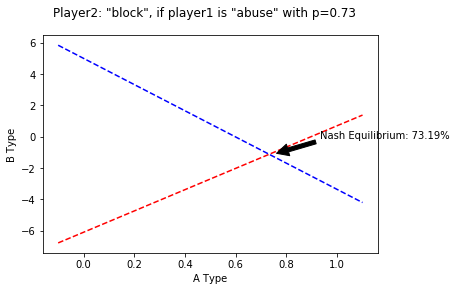

In [16]:
t1 = np.arange(-0.1, 1.1, 0.1)

# red dashes, blue squares and green triangles
plt.plot(t1, fl(a,b,t1), 'r--', t1, fr(c,d,t1), 'b--')
plt.xlabel('A Type')
plt.ylabel('B Type')
plt.annotate('Nash Equilibrium: {:.2f}%'.format(p*100), xy=(p+0.02, fr(c,d,p)+0.02), xytext=(p+0.2, fr(c,d,p)+1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.suptitle('Player2: "{}", if player1 is "{}" with p={:.2f}'.format(
    strategy['player2'][resultAType['player2'][0]['idx']], 
    strategy['player1'][resultAType['player1'][0]['idx']], 
    p))
plt.show()

# Conclusion

From the risk rating, using the model defined, we can identify that our "allow" treshold should be ~73%. 

If the management doesn't accept this limit, the ratings of the factors should be revisited. Othewise, it should be the best possible strategy.